In [1]:
import pandas as pd
import allel
from sklearn.metrics import r2_score
from scipy.stats import spearmanr
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import cvxpy as cp

/home/tbellagio/.local/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
split = 0 

In [3]:
## Import deltap ld for testing because not ldp will take forever 
delta_ldp = pd.read_csv('/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_hapFIRE_delta_p_LDpruned.txt', 
                        sep = '\t')

In [4]:
ld_prunned_vcf_file = '/carnegie/nobackup/scratch/xwu/grenet/hapFIRE_updatedVCF/greneNet_final_v1.1_LDpruned.recode.vcf'
vcf = allel.read_vcf(ld_prunned_vcf_file)

In [5]:
snps_dict = {key: value for key, value in zip(delta_ldp.index.values, vcf['variants/ID'])}

In [6]:
#af_predictions['snp'] = af_predictions['Unnamed: 0'].map(snps_dict)

In [7]:
#af_predictions['P'] = 0.05

In [8]:
import os

In [94]:
pd.Series(os.listdir('predictions/')).str.split('split').str[1].str.replace('.csv', '').astype(int).sort_values()

60     0
78     1
11     2
47     3
45     4
      ..
32    95
70    96
92    97
68    98
95    99
Length: 100, dtype: int64

In [16]:
r2 = pd.read_csv(f'r2/rf_r2_split{split}.csv').sort_values('r2train')

In [19]:
r2['snp_id'] = r2['snp_index'].map(snps_dict)

In [23]:
r2.tail(5)['snp_id'].values

array(['2_1312677', '5_3578402', '5_9705721', '5_22508548', '1_21185782'],
      dtype=object)

In [9]:
    af_predictions = pd.read_csv(f'predictions/af_predictions_split{split}.csv')


In [10]:
af_predictions

,Unnamed: 0,4_1_4,4_3_1,4_3_2,4_3_3,4_3_5,4_3_6,4_3_7,4_3_8,4_3_9,...,57_3_4,57_3_6,57_3_7,57_3_9,57_3_10,57_3_12,57_3_13,57_3_15,57_3_16,57_3_18
0,19,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,...,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263
1,45,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,...,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920
2,52,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,...,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334
3,67,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,...,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954
4,172,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,...,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,13878,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,...,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046
323,13893,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,...,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712
324,13909,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,...,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135
325,13918,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,...,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077


In [105]:
for split in range(100):
    af_predictions = pd.read_csv(f'predictions/af_predictions_split{split}.csv')
    index_sel = af_predictions['Unnamed: 0']
    delta_ldp_sel = delta_ldp.iloc[index_sel,:]
    af_predictions = af_predictions.set_index('Unnamed: 0')
    results = {}
    for sample in af_predictions.columns:
        af_comp = pd.concat([delta_ldp_sel[sample], af_predictions[sample]],axis=1)
        af_comp.columns = ['real', 'pred']
        r2 = r2_score(af_comp['real'], af_comp['pred'])

        X = af_comp['real'].values.reshape(-1, 1)  # Independent variable
        y = af_comp['pred'].values # Dependent variable
        model = LinearRegression().fit(X, y)
        y_pred = model.predict(X)
        r2_model = r2_score(y, y_pred)
        
        af_comp = af_comp.sort_values('real')
        sp_correlation, _ = spearmanr(af_comp['real'], af_comp['pred'])
        results[sample] = [r2, r2_model, sp_correlation]
        
    results = pd.DataFrame(results).T.reset_index()
    results.columns = ['sample','r2', 'r2model', 'sp_corr']
    results.to_csv(f'results_af/results_af_split{split}')

(0.0, 1.0)

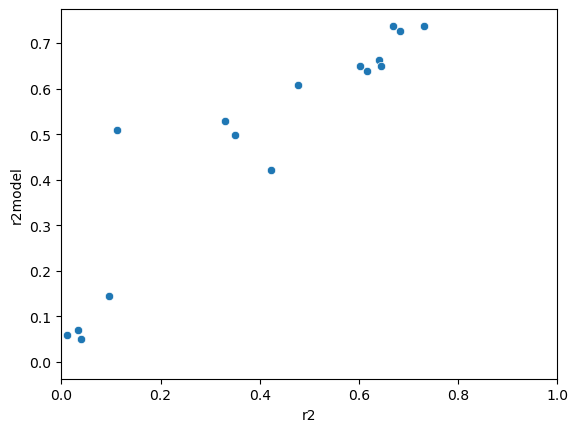

In [113]:
ax = sns.scatterplot(results, x = 'r2', y = 'r2model' )
ax.set_xlim(0, 1) 

In [59]:
        r2_af = {}
        for i in delta_p_sel.columns:
            # Reshape the data to fit the model
            X = delta_p_sel[i].values.reshape(-1, 1)  # Independent variable
            y = predicted_delta_p_bio1t[i].values # Dependent variable
        
            # Fit the linear model
            #model = LinearRegression().fit(X, y)
        
            # Predict the values
            #y_pred = model.predict(X)
        
            # Calculate R^2
            r_squared = r2_score(delta_p_sel[i], predicted_delta_p_bio1t[i])
            r2_af[i] = r_squared

In [114]:
## predict ecotypes

In [115]:
af_founder = pd.read_csv('../leave_1_out/af_founder.csv')

In [116]:
genotype_counts = pd.read_csv('../leave_1_out/genotype_counts_fullgenome231ecotypes.csv').drop('Unnamed: 0', axis=1)

In [117]:
path_ecotypes = '/carnegie/nobackup/scratch/xwu/grenet/merged_frequency/merged_ecotype_frequency.txt'
real_ef = pd.read_csv(path_ecotypes, sep = '\t')

In [179]:
predicted_delta_p_bio1

,4_1_4,4_3_1,4_3_2,4_3_3,4_3_5,4_3_6,4_3_7,4_3_8,4_3_9,4_3_10,...,57_3_4,57_3_6,57_3_7,57_3_9,57_3_10,57_3_12,57_3_13,57_3_15,57_3_16,57_3_18
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
19,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,...,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263
45,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,...,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920
52,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,...,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334
67,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,...,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954
172,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,...,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13878,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,...,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046
13893,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,...,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712
13909,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,...,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135


In [ ]:
predicted_allele_freq_bio1

In [178]:
predicted_allele_freq_bio1

,4_1_4,4_3_1,4_3_2,4_3_3,4_3_5,4_3_6,4_3_7,4_3_8,4_3_9,4_3_10,...,57_3_4,57_3_6,57_3_7,57_3_9,57_3_10,57_3_12,57_3_13,57_3_15,57_3_16,57_3_18
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
19,0.215780,0.215780,0.215780,0.215780,0.215780,0.215780,0.215780,0.215780,0.215780,0.215780,...,-0.050222,-0.050222,-0.050222,-0.050222,-0.050222,-0.050222,-0.050222,-0.050222,-0.050222,-0.050222
45,0.269271,0.269271,0.269271,0.269271,0.269271,0.269271,0.269271,0.269271,0.269271,0.269271,...,0.064564,0.064564,0.064564,0.064564,0.064564,0.064564,0.064564,0.064564,0.064564,0.064564
52,-0.001885,-0.001885,-0.001885,-0.001885,-0.001885,-0.001885,-0.001885,-0.001885,-0.001885,-0.001885,...,0.396482,0.396482,0.396482,0.396482,0.396482,0.396482,0.396482,0.396482,0.396482,0.396482
67,-0.233311,-0.233311,-0.233311,-0.233311,-0.233311,-0.233311,-0.233311,-0.233311,-0.233311,-0.233311,...,0.012748,0.012748,0.012748,0.012748,0.012748,0.012748,0.012748,0.012748,0.012748,0.012748
172,0.200957,0.200957,0.200957,0.200957,0.200957,0.200957,0.200957,0.200957,0.200957,0.200957,...,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862,0.000862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13878,0.502274,0.502274,0.502274,0.502274,0.502274,0.502274,0.502274,0.502274,0.502274,0.502274,...,0.379758,0.379758,0.379758,0.379758,0.379758,0.379758,0.379758,0.379758,0.379758,0.379758
13893,0.167370,0.167370,0.167370,0.167370,0.167370,0.167370,0.167370,0.167370,0.167370,0.167370,...,-0.000433,-0.000433,-0.000433,-0.000433,-0.000433,-0.000433,-0.000433,-0.000433,-0.000433,-0.000433
13909,0.276366,0.276366,0.276366,0.276366,0.276366,0.276366,0.276366,0.276366,0.276366,0.276366,...,0.434595,0.434595,0.434595,0.434595,0.434595,0.434595,0.434595,0.434595,0.434595,0.434595


In [183]:
pred_ecotypes_frequency.columns

Index(['4_1_4', '4_3_1', '4_3_2', '4_3_3', '4_3_5', '4_3_6', '4_3_7', '4_3_8',
       '4_3_9', '4_3_10', '4_3_11', '4_3_12', '24_1_1', '24_1_2', '24_1_3',
       '24_1_4', '24_1_5', '24_1_7', '24_1_9', '24_1_12', '24_2_10', '24_2_11',
       '48_3_1', '48_3_2', '48_3_3', '48_3_4', '48_3_6', '48_3_8', '48_3_9',
       '48_3_10', '48_3_11', '48_3_12', '52_3_1', '52_3_2', '52_3_3', '52_3_4',
       '52_3_5', '52_3_6', '52_3_7', '52_3_8', '52_3_9', '52_3_10', '52_3_11',
       '52_3_12', '55_1_7', '55_1_9', '55_2_3', '55_2_5', '55_3_1', '55_3_2',
       '55_3_4', '55_3_6', '55_3_8', '55_3_10', '55_3_11', '55_3_12', '57_3_1',
       '57_3_3', '57_3_4', '57_3_6', '57_3_7', '57_3_9', '57_3_10', '57_3_12',
       '57_3_13', '57_3_15', '57_3_16', '57_3_18'],
      dtype='object')

In [181]:
real_ef_test.columns

Index(['2_1_8', '2_1_9', '2_1_11', '2_1_12', '2_2_5', '2_2_6', '2_2_7',
       '5_3_1', '5_3_2', '5_3_3', '5_3_4', '5_3_5', '5_3_6', '5_3_7', '5_3_8',
       '5_3_9', '5_3_10', '5_3_11', '5_3_12', '6_1_1', '6_1_4', '6_2_2',
       '6_2_3', '6_2_5', '6_2_6', '6_2_7', '6_2_8', '6_2_9', '6_2_10',
       '6_2_11', '6_2_12', '11_1_4', '11_1_8', '11_1_9', '11_1_11', '11_2_2',
       '11_2_7', '11_2_12', '11_3_1', '11_3_3', '11_3_5', '11_3_6', '52_3_1',
       '52_3_2', '52_3_3', '52_3_4', '52_3_5', '52_3_6', '52_3_7', '52_3_8',
       '52_3_9', '52_3_10', '52_3_11', '52_3_12', '54_3_1', '54_3_2', '54_3_3',
       '54_3_4', '54_3_5', '54_3_6', '54_3_7', '54_3_8', '54_3_9', '54_3_10',
       '54_3_11', '54_3_12'],
      dtype='object')

In [184]:
for split_number in range(100):
    predicted_delta_p_bio1 = pd.read_csv(f'predictions/af_predictions_split{split_number}.csv')
    index_sel = predicted_delta_p_bio1['Unnamed: 0']
    delta_ldp_sel = delta_ldp.iloc[index_sel,:]
    predicted_delta_p_bio1 = predicted_delta_p_bio1.set_index('Unnamed: 0')
    
    af_founder_sel = af_founder.iloc[index_sel]
    
    af_founder_sel = np.array(af_founder_sel['af'])
    
    af_founder_sel_reshaped = af_founder_sel[:, np.newaxis]
    
    # Add af_founder_sel to each element of the rows of predicted_delta_p_bio1
    predicted_allele_freq_bio1 = predicted_delta_p_bio1 + af_founder_sel_reshaped
    
    genotype_counts_filt = genotype_counts.iloc[index_sel, :]
    
    genotype_counts_array = genotype_counts_filt.to_numpy()
    
    pred_ecotypes_frequency_r2 = {}
    pred_ecotypes_frequency = {}
    
    for sample_number, sample in enumerate(predicted_allele_freq_bio1.columns):
        ## just select the frist sample
        one_sample = predicted_allele_freq_bio1.loc[:, sample]
        
        y = np.asarray(one_sample) * 2
        
        h = cp.Variable(231)
        
        product = np.asarray(genotype_counts_array) @ h 
        
        diff = product - y
        
        constraints = [0 <= h, sum(h) == 1]
        
        problem = cp.Problem(cp.Minimize(cp.norm(diff)), constraints)
        
        # Solve the optimization problem using the SCS solver, with verbose output disabled.
        problem.solve(solver='SCS', verbose=False,eps=1e-6)
        
        ypred = np.asarray(genotype_counts_array) @ h.value
        
        pred_ecotypes_frequency_r2[sample] = r2_score(y, ypred)
        pred_ecotypes_frequency[sample] = h.value
    
    
    ## save the r2 for predited ecotypefreq
    pred_ecotypes_frequency_r2 = pd.DataFrame(list(pred_ecotypes_frequency_r2.items()), columns=['Index', 'Value'])
    pred_ecotypes_frequency_r2.columns = ['sample', 'r2_fit'] 
    #pred_ecotypes_frequency_r2.to_csv(output_file_efpredr2)    
    ## get the real ecotype freq 
    test_samples = predicted_allele_freq_bio1.columns 
    real_ef_test = real_ef[test_samples]
    
    pred_ecotypes_frequency = pd.DataFrame(pred_ecotypes_frequency)
    
    print((pred_ecotypes_frequency.columns == real_ef_test.columns).all())
    
    r2_ef = {}
    spcorrelation_ef = {}
    
    for i in real_ef_test.columns:
    
        # Get the ranks of the data
        X_ranked = real_ef_test[i]#.sort_values().reset_index()['index'] #.reshape(-1, 1)  # Independent variable
        y_ranked = pred_ecotypes_frequency[i]#.sort_values().reset_index()['index']  # Dependent variable
    
        # Compute Spearman's rank correlation
        correlation, _ = spearmanr(X_ranked, y_ranked)
        spcorrelation_ef[i] = correlation
    
        # Reshape the data to fit the model
        X = real_ef_test[i].values.reshape(-1, 1)  # Independent variable
        y = pred_ecotypes_frequency[i].values  # Dependent variable
    
        # Calculate R^2
        r_squared = r2_score(X, y)
        r2_ef[i] = r_squared
    
    
    spcorrelation_ef = pd.DataFrame(list(spcorrelation_ef.items()), columns=['Index', 'Value'])
    spcorrelation_ef.columns = ['sample', 'r2'] 
    
    r2_ef = pd.DataFrame(list(r2_ef.items()), columns=['Index', 'Value'])
    r2_ef.columns = ['sample', 'r2'] 
    
    spcorrelation_ef.to_csv(f'results_ef/spcorrelation_ef_split{split_number}.csv')
    r2_ef.to_csv(f'results_ef/r2_ef_split{split_number}.csv')
    
    print(f'done{split_number}')

True
done0
True
done1
True
done2
True
done3
True
done4
True
done5
True
done6
True
done7
True
done8
True
done9
True
done10
True
done11
True
done12
True
done13
True
done14
True
done15
True
done16
True
done17
True
done18
True
done19
True
done20
True
done21
True
done22
True
done23
True
done24
True
done25
True
done26
True
done27
True
done28
True
done29
True
done30
True
done31
True
done32
True
done33
True
done34
True
done35
True
done36
True
done37
True
done38
True
done39
True
done40
True
done41
True
done42
True
done43
True
done44
True
done45
True
done46
True
done47
True
done48
True
done49
True
done50
True
done51
True
done52
True
done53
True
done54
True
done55
True
done56
True
done57
True
done58
True
done59
True
done60
True
done61
True
done62
True
done63
True
done64
True
done65
True
done66
True
done67
True
done68
True
done69
True
done70
True
done71
True
done72
True
done73
True
done74
True
done75
True
done76
True
done77
True
done78
True
done79
True
done80
True
done81
True
done82
True
done83
Tr

In [166]:
split_number

99

In [ ]:
results = {}
for split_number in range(100):
    results[split_number] = pd.read_csv(f'results_ef/r2_ef_split{split_number}.csv')

all_ef = pd.concat(results)

all_ef['site'] = all_ef['sample'].str.split('_').str[0]

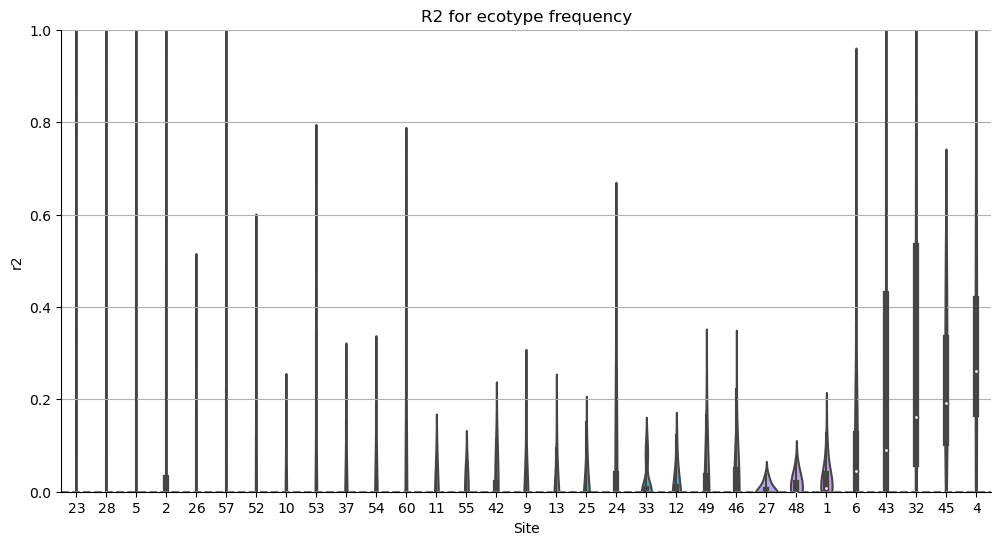

In [198]:
medians = all_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_ef, y='r2', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
plt.ylim(-0, 1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('R2 for ecotype frequency')
plt.xlabel('Site')
plt.ylabel('r2')

# Show the plot
plt.show()

In [190]:
results = {}
for split_number in range(100):
    results[split_number] = pd.read_csv(f'results_ef/spcorrelation_ef_split{split_number}.csv')

all_ef = pd.concat(results)

all_ef['site'] = all_ef['sample'].str.split('_').str[0]

In [191]:
all_ef

Unnamed: 0   sample        r2 site
0  0            0    4_1_4 -0.130408    4
   1            1    4_3_1 -0.155758    4
   2            2    4_3_2 -0.149406    4
   3            3    4_3_3 -0.131536    4
   4            4    4_3_5 -0.097752    4
...           ...      ...       ...  ...
99 61          61   54_3_8  0.110790   54
   62          62   54_3_9  0.036193   54
   63          63  54_3_10 -0.016082   54
   64          64  54_3_11  0.019527   54
   65          65  54_3_12  0.019831   54

[6861 rows x 4 columns]

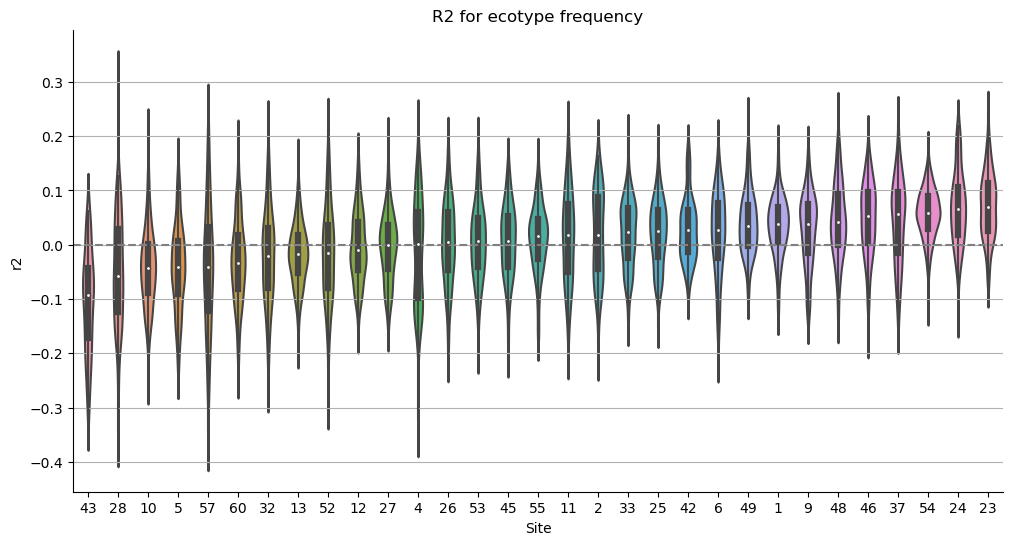

In [192]:
medians = all_ef.groupby('site')['r2'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_ef, y='r2', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('R2 for ecotype frequency')
plt.xlabel('Site')
plt.ylabel('r2')

# Show the plot
plt.show()

In [195]:
results = {}
for split_number in range(100):
    results[split_number] = pd.read_csv(f'results_af/results_af_split{split_number}')

all_ef = pd.concat(results)

all_ef['site'] = all_ef['sample'].str.split('_').str[0]

In [196]:
all_ef

Unnamed: 0   sample        r2   r2model   sp_corr site
0  0            0    4_1_4 -1.882820  0.462157  0.691959    4
   1            1    4_3_1  0.396106  0.422145  0.650493    4
   2            2    4_3_2  0.681769  0.684551  0.828953    4
   3            3    4_3_3  0.270333  0.276277  0.506499    4
   4            4    4_3_5  0.253608  0.270143  0.468462    4
...           ...      ...       ...       ...       ...  ...
99 61          61   54_3_8 -0.514377  0.017011  0.177522   54
   62          62   54_3_9 -0.084243  0.001737  0.161698   54
   63          63  54_3_10 -0.238809  0.003907  0.091296   54
   64          64  54_3_11 -0.076580  0.022982  0.184352   54
   65          65  54_3_12 -0.229841  0.002076  0.076795   54

[6861 rows x 6 columns]

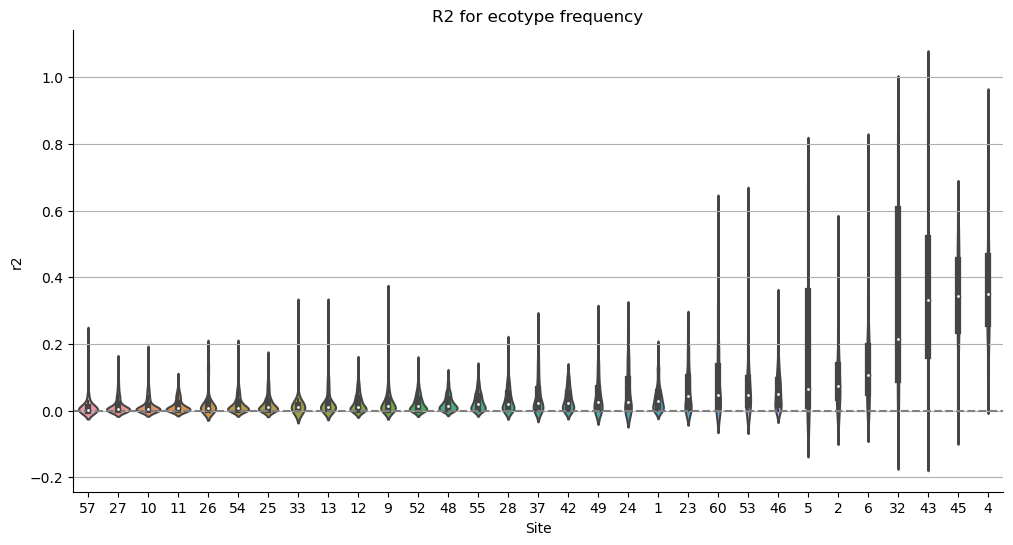

In [199]:
medians = all_ef.groupby('site')['r2model'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_ef, y='r2model', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('R2 for ecotype frequency')
plt.xlabel('Site')
plt.ylabel('r2')

# Show the plot
plt.show()

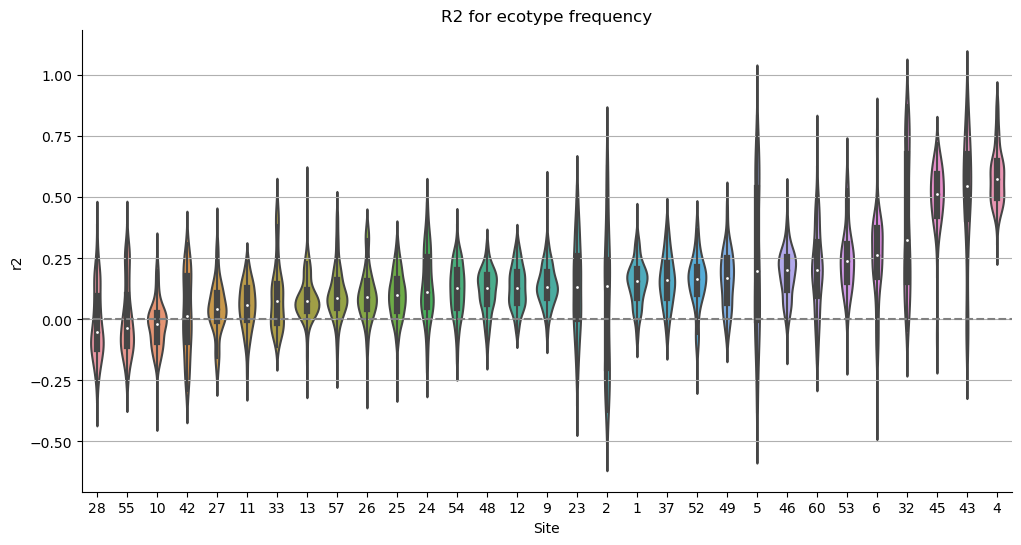

In [200]:
medians = all_ef.groupby('site')['sp_corr'].median().sort_values()

# Set the size of the plot
plt.figure(figsize=(12, 6))  # You can adjust the width and height as needed

# Create the plot, ordering by median 'r2'
# Use 'scale' to adjust the width of violins; options are 'area', 'count', or 'width'
sns.violinplot(data=all_ef, y='sp_corr', x='site', order=medians.index)

# Draw a horizontal line at y=0
plt.axhline(0, color='grey', linestyle='--')  # Color and style are adjustable
#plt.ylim(-0.15, 1.1)
plt.grid(axis='y')
# Remove top and right spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)  # Remove the top spine
ax.spines['right'].set_visible(False)

# Optionally, add labels or a title
plt.title('R2 for ecotype frequency')
plt.xlabel('Site')
plt.ylabel('r2')

# Show the plot
plt.show()

In [74]:
af_comp.sort_values('real')

,real,pred
8475,-0.223757,-0.192195
184,-0.211278,-0.252522
3926,-0.197217,-0.204006
13909,-0.194913,-0.137094
6366,-0.170316,-0.203075
...,...,...
2076,0.165938,0.223798
13918,0.183171,0.138925
13851,0.191208,0.235473
19,0.192863,0.180739


In [72]:
r2 = r2_score(af_comp['real'], af_comp['pred'])


-1.8828197467748162

In [49]:
af_predictions

,Unnamed: 0,4_1_4,4_3_1,4_3_2,4_3_3,4_3_5,4_3_6,4_3_7,4_3_8,4_3_9,...,57_3_7,57_3_9,57_3_10,57_3_12,57_3_13,57_3_15,57_3_16,57_3_18,P,snp
0,19,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,...,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,0.05,1_252790
1,45,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,...,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.05,1_786902
2,52,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,...,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.05,1_900543
3,67,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,...,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.05,1_1201325
4,172,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,...,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,0.05,1_3087281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,13878,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,...,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,0.05,5_25168249
323,13893,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,...,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,0.05,5_25412547
324,13909,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,...,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.05,5_25657589
325,13918,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,...,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.05,5_25774444


In [48]:
af_predictions.columns 

Index(['Unnamed: 0', '4_1_4', '4_3_1', '4_3_2', '4_3_3', '4_3_5', '4_3_6',
       '4_3_7', '4_3_8', '4_3_9', '4_3_10', '4_3_11', '4_3_12', '24_1_1',
       '24_1_2', '24_1_3', '24_1_4', '24_1_5', '24_1_7', '24_1_9', '24_1_12',
       '24_2_10', '24_2_11', '48_3_1', '48_3_2', '48_3_3', '48_3_4', '48_3_6',
       '48_3_8', '48_3_9', '48_3_10', '48_3_11', '48_3_12', '52_3_1', '52_3_2',
       '52_3_3', '52_3_4', '52_3_5', '52_3_6', '52_3_7', '52_3_8', '52_3_9',
       '52_3_10', '52_3_11', '52_3_12', '55_1_7', '55_1_9', '55_2_3', '55_2_5',
       '55_3_1', '55_3_2', '55_3_4', '55_3_6', '55_3_8', '55_3_10', '55_3_11',
       '55_3_12', '57_3_1', '57_3_3', '57_3_4', '57_3_6', '57_3_7', '57_3_9',
       '57_3_10', '57_3_12', '57_3_13', '57_3_15', '57_3_16', '57_3_18', 'P',
       'snp'],
      dtype='object')

In [46]:
delta_ldp

,1_1_1,1_1_2,1_1_3,1_1_4,1_1_5,1_1_6,1_1_7,1_1_8,1_1_9,1_1_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,0.004307,-0.040637,-0.004287,-0.015873,-0.053259,-0.037627,-0.033974,-0.009585,-0.023888,-0.008863,...,-0.024354,-0.042345,-0.061356,0.033749,0.071486,-0.018109,-0.046962,-0.040858,-0.064946,-0.061560
1,0.021457,-0.088651,0.004390,0.025524,0.034498,0.016087,-0.062403,0.093687,0.028122,-0.056971,...,0.007861,-0.128135,0.126683,0.232693,0.171781,0.023310,0.285832,0.230410,0.226659,0.314300
2,-0.005744,0.024627,-0.011318,0.025017,0.002431,0.014659,0.018960,0.030275,-0.011296,0.006816,...,0.233752,-0.062632,0.013870,0.118235,0.082677,0.117794,-0.023277,0.101131,-0.060781,0.041234
3,0.031118,-0.051347,-0.047434,-0.014627,0.036685,0.025658,-0.013996,0.017569,-0.062823,-0.023472,...,0.059928,-0.072573,0.017467,0.053862,0.342039,0.025348,0.248315,-0.054728,0.077901,0.228589
4,0.017241,-0.013755,-0.030960,0.019993,-0.094986,-0.017772,-0.036988,0.048218,-0.007749,-0.015827,...,0.018227,-0.178115,-0.258226,0.088831,-0.005073,0.139147,-0.320786,0.128526,-0.082863,-0.159533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13980,-0.001418,-0.093075,-0.026886,-0.075193,-0.158522,-0.151619,-0.163254,-0.152407,-0.085281,-0.163145,...,-0.266141,-0.085991,0.052390,0.127759,0.208708,0.033645,-0.071936,-0.035552,-0.347844,-0.134251
13981,-0.016722,-0.076694,-0.062769,-0.014961,-0.069493,-0.034410,-0.064655,-0.042545,-0.045965,-0.013406,...,-0.063621,-0.022356,-0.089119,-0.003933,-0.050919,-0.105604,-0.105322,-0.087621,-0.106745,-0.046434
13982,-0.012823,-0.009701,-0.001829,-0.021972,-0.000206,0.035606,-0.014436,-0.030566,-0.039743,0.015018,...,0.076179,0.135417,-0.066773,0.045670,-0.083042,-0.022489,-0.083896,0.001772,-0.000019,-0.084662
13983,0.039441,0.036786,0.018811,0.031839,0.024310,-0.021833,0.042249,-0.006413,0.045343,0.085519,...,0.139346,-0.013219,-0.059179,-0.062184,0.092326,0.176762,-0.057649,0.033528,-0.059183,-0.036580


,Unnamed: 0,4_1_4,4_3_1,4_3_2,4_3_3,4_3_5,4_3_6,4_3_7,4_3_8,4_3_9,...,57_3_7,57_3_9,57_3_10,57_3_12,57_3_13,57_3_15,57_3_16,57_3_18,P,snp
0,19,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,0.180739,...,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,-0.085263,0.05,1_252790
1,45,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,0.239628,...,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.034920,0.05,1_786902
2,52,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,-0.025033,...,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.373334,0.05,1_900543
3,67,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,-0.240105,...,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.005954,0.05,1_1201325
4,172,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,0.196667,...,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,-0.003428,0.05,1_3087281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
322,13878,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,0.081470,...,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,-0.041046,0.05,5_25168249
323,13893,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,0.156091,...,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,-0.011712,0.05,5_25412547
324,13909,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,-0.137094,...,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.021135,0.05,5_25657589
325,13918,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,0.138925,...,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.065077,0.05,5_25774444


In [44]:
# Output file path
output = f'clumping_input/input_clumping_split{split}.txt'

# Writing to the file
with open(output, 'w') as file:
    # Write the header
    file.write("SNP P\n")
    # Iterate through each row in the DataFrame
    for index, row in af_predictions[['snp', 'P']].iterrows():
        file.write(f"{row['snp']} {row['P']}\n")

In [ ]:
# Run PLINK clumping
plink \
--bfile ../idea_fromind_to_pop/greneNet_final_v1.1.recode \
--clump clumping_input/input_clumping_split0.txt \
--clump-p1 0.05 \
--clump-r2 0.2 \
--out clumping_output/input_clumping_split0.txt

In [45]:
!pwd

/carnegie/nobackup/scratch/tbellagio/gea_grene-net/gradient_forest


In [9]:
## Import deltap ld for testing because not ldp will take forever 
#delta_p = pd.read_csv('../leave_1_out/delta_p.csv',nrows=10)

,1_1_1,1_1_2,1_1_3,1_1_4,1_1_5,1_1_6,1_1_7,1_1_8,1_1_9,1_1_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,0.004307,-0.040637,-0.004287,-0.015873,-0.053259,-0.037627,-0.033974,-0.009585,-0.023888,-0.008863,...,-0.024354,-0.042345,-0.061356,0.033749,0.071486,-0.018109,-0.046962,-0.040858,-0.064946,-0.061560
1,0.021457,-0.088651,0.004390,0.025524,0.034498,0.016087,-0.062403,0.093687,0.028122,-0.056971,...,0.007861,-0.128135,0.126683,0.232693,0.171781,0.023310,0.285832,0.230410,0.226659,0.314300
2,-0.005744,0.024627,-0.011318,0.025017,0.002431,0.014659,0.018960,0.030275,-0.011296,0.006816,...,0.233752,-0.062632,0.013870,0.118235,0.082677,0.117794,-0.023277,0.101131,-0.060781,0.041234
3,0.031118,-0.051347,-0.047434,-0.014627,0.036685,0.025658,-0.013996,0.017569,-0.062823,-0.023472,...,0.059928,-0.072573,0.017467,0.053862,0.342039,0.025348,0.248315,-0.054728,0.077901,0.228589
4,0.017241,-0.013755,-0.030960,0.019993,-0.094986,-0.017772,-0.036988,0.048218,-0.007749,-0.015827,...,0.018227,-0.178115,-0.258226,0.088831,-0.005073,0.139147,-0.320786,0.128526,-0.082863,-0.159533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13980,-0.001418,-0.093075,-0.026886,-0.075193,-0.158522,-0.151619,-0.163254,-0.152407,-0.085281,-0.163145,...,-0.266141,-0.085991,0.052390,0.127759,0.208708,0.033645,-0.071936,-0.035552,-0.347844,-0.134251
13981,-0.016722,-0.076694,-0.062769,-0.014961,-0.069493,-0.034410,-0.064655,-0.042545,-0.045965,-0.013406,...,-0.063621,-0.022356,-0.089119,-0.003933,-0.050919,-0.105604,-0.105322,-0.087621,-0.106745,-0.046434
13982,-0.012823,-0.009701,-0.001829,-0.021972,-0.000206,0.035606,-0.014436,-0.030566,-0.039743,0.015018,...,0.076179,0.135417,-0.066773,0.045670,-0.083042,-0.022489,-0.083896,0.001772,-0.000019,-0.084662
13983,0.039441,0.036786,0.018811,0.031839,0.024310,-0.021833,0.042249,-0.006413,0.045343,0.085519,...,0.139346,-0.013219,-0.059179,-0.062184,0.092326,0.176762,-0.057649,0.033528,-0.059183,-0.036580


In [4]:
delta_ldp

,1_1_1,1_1_2,1_1_3,1_1_4,1_1_5,1_1_6,1_1_7,1_1_8,1_1_9,1_1_10,...,60_1_3,60_1_4,60_1_5,60_1_6,60_1_7,60_1_8,60_1_9,60_1_10,60_1_11,60_1_12
0,0.004307,-0.040637,-0.004287,-0.015873,-0.053259,-0.037627,-0.033974,-0.009585,-0.023888,-0.008863,...,-0.024354,-0.042345,-0.061356,0.033749,0.071486,-0.018109,-0.046962,-0.040858,-0.064946,-0.061560
1,0.021457,-0.088651,0.004390,0.025524,0.034498,0.016087,-0.062403,0.093687,0.028122,-0.056971,...,0.007861,-0.128135,0.126683,0.232693,0.171781,0.023310,0.285832,0.230410,0.226659,0.314300
2,-0.005744,0.024627,-0.011318,0.025017,0.002431,0.014659,0.018960,0.030275,-0.011296,0.006816,...,0.233752,-0.062632,0.013870,0.118235,0.082677,0.117794,-0.023277,0.101131,-0.060781,0.041234
3,0.031118,-0.051347,-0.047434,-0.014627,0.036685,0.025658,-0.013996,0.017569,-0.062823,-0.023472,...,0.059928,-0.072573,0.017467,0.053862,0.342039,0.025348,0.248315,-0.054728,0.077901,0.228589
4,0.017241,-0.013755,-0.030960,0.019993,-0.094986,-0.017772,-0.036988,0.048218,-0.007749,-0.015827,...,0.018227,-0.178115,-0.258226,0.088831,-0.005073,0.139147,-0.320786,0.128526,-0.082863,-0.159533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13980,-0.001418,-0.093075,-0.026886,-0.075193,-0.158522,-0.151619,-0.163254,-0.152407,-0.085281,-0.163145,...,-0.266141,-0.085991,0.052390,0.127759,0.208708,0.033645,-0.071936,-0.035552,-0.347844,-0.134251
13981,-0.016722,-0.076694,-0.062769,-0.014961,-0.069493,-0.034410,-0.064655,-0.042545,-0.045965,-0.013406,...,-0.063621,-0.022356,-0.089119,-0.003933,-0.050919,-0.105604,-0.105322,-0.087621,-0.106745,-0.046434
13982,-0.012823,-0.009701,-0.001829,-0.021972,-0.000206,0.035606,-0.014436,-0.030566,-0.039743,0.015018,...,0.076179,0.135417,-0.066773,0.045670,-0.083042,-0.022489,-0.083896,0.001772,-0.000019,-0.084662
13983,0.039441,0.036786,0.018811,0.031839,0.024310,-0.021833,0.042249,-0.006413,0.045343,0.085519,...,0.139346,-0.013219,-0.059179,-0.062184,0.092326,0.176762,-0.057649,0.033528,-0.059183,-0.036580
